Astronomical data analysis using Python
===

Lecture 6
-------

# List Comprehension 

In [1]:
cities = ["Pune", "Mumbai", "Delhi", "Gauhati", "Chennai"]
newlist = []

for x in cities:
  if "u" in x:
    newlist.append(x)

print(newlist)

['Pune', 'Mumbai', 'Gauhati']


In [2]:
cities = ["Pune", "Mumbai", "Delhi", "Gauhati", "Chennai"]

newlist = [x for x in cities if "u" in x]

print(newlist)

['Pune', 'Mumbai', 'Gauhati']


# List comprehension syntax

`newlist = [expression for item in iterable if condition == True]`

The old list remains unchanged in the list comprehension. The iterable can be any iterable including a list. The if condition is optional.

In [3]:
newlist = [x for x in range(10) if (x < 7) & (x >3)]
print (newlist)

[4, 5, 6]


# Nested lists

In [4]:
k = [ (i,j) for i in range(3) for j in range(3) ]
print (k)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


# List Comprehensions - Dos and Donts

For simple for-loops like we saw earlier, you SHOULD use list comprehensions.
In fact, list comprehensions run faster than traditional loops.

But,

List comprehensions, especially nested ones, can obfuscate code.
In such a case, it's better to use elaborate loops.

# Installing third party modules

See the instructions at:

https://docs.python.org/3/installing/index.html

Please install `numpy, scipy, matplotlib, astropy, astroquery` modules on your computer.
Except for `astroquery` all modules are also available in Google Colab. Even astroquery can be installed on Google Colab using `!pip install astroquery`



# Python data processing using lists is very slow

Compared to compiled languages, for loops in Python run extremely slowly. The alternative is to define a more restrictive data structure than a list - **a numpy array**. Unlike lists, a numpy array contains data of only one type.

In exchange for this restriction, numpy arrays provide for unprecendented speed and convenience and make numerical computation practically possible in Python. The high speed of numpy is due to the fact that its underlying, highly optimised code is written in C.

**All scientific and technical computing in Python today makes use of `numpy` in one way or another.**

Adding two arrays - the slow Python way
===

In [5]:
l1=[1,2,4]; l2=[4,8,6]
print (l1+l2)


[1, 2, 4, 4, 8, 6]


In [6]:
l3 = [0]*3
for i in range(3):
    l3[i] = l1[i] +l2[i]
    
print (l3)

[5, 10, 10]


What we ideally want
===

We want `print (l1+l2)` to give us `[5,10,10]`

Such behaviour is common in Fortran 90, Matlab, IDL

Creating an n-dimensional array - numpy.ndarray
===

In [7]:
import numpy as np
print (np.version.version)

a = np.array([1,2,3]) # Argument to np.array can be a list
b = np.array((1,2,3)) # or a tuple
print (type(a))
print (type(b))


2.1.2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Adding Arrays with numpy
===

In [8]:
l1 = [1,2,3]
l2=[4,5,6]
a1 = np.array(l1)
a2 = np.array(l2)
print (l1+l2)
print (a1+a2)

[1, 2, 3, 4, 5, 6]
[5 7 9]


In [9]:
import numpy as np


Arithmetic operations in numpy
===

In [10]:
print (a1+a2) # addition
print (a1-a2) # substraction
print (a1*a2) # multiplication
print (a1/a2) # division
print (a2%a1) # modulo
print (a1**2) # elementwise squared

[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]
[0 1 0]
[1 4 9]


Numpy ufuncs
===

In [11]:
import numpy as np


add (+) log  greater (>) subtract (-) log10 greater_equal ($>=$)

multiply (*) cos  less (<) divide (/) arcos less_equal (<=)

remainder (%) sin logical_and absolute abs arcsin logical_or

floor tan logical_xor ceil  arctan  bitwise_and (&)

fmod cosh bitwise_or (|) conjugate sinh  bitwise_xor (^)

minimum tanh bitwise_not (~) maximum  sqrt rshift (>>)

power (**) equal (==) lshift (<<) exp not_equal (!=)


Why is an array not a list?
===

A numpy array is a table of elements (usually numbers),
all of the __same__ type. Whatever comes inside the numpy array is of the same type and that is the one of the important things to keep in the mind.

Implicit and explicit datatype declaration
===

In [12]:
import numpy as np
ai = np.array([1, 2, 3])
af = np.array([1, 2, 3.])
ac = np.array([1j, 2, 3.])
print (ai.dtype)
print (af.dtype)
print (ac.dtype)
af = np.array([1,2,3], float)
ac = np.array([1,2,3], complex)
afn = np.array([1,2], np.longdouble) # numpy float type


int64
float64
complex128


Numpy float datatypes
===

* `np.float` (== Python float type)
* `np.float32` (single precision)
* `np.float64` (double precision)
* `np.double` (synonym, double prec.)
* `np.longdouble` (very platform dependent !!! np.float96 or np.float128)

Other numpy datatypes
===

* Integer datatypes `np.int8 ...int16 ...int32 ...int64`
* Unsigned (!) integer datatypes `np.uint8 ...uint16 ...uint32 ...uint64`
* Complex datatypes `np.complex64 ...complex128...complex256`
* Boolean `np.bool`


Defining your own datatypes
===


In [13]:
dt= np.dtype([('value',int),('status',bool)])
a = np.array([(0,True),(100,False)],dtype=dt)
print (a['value'])
print (a['status'])
print (a['value'][1])
print (a[0]['status'])


[  0 100]
[ True False]
100
True


### Extra Practice Problem: Track Students' Grades and Attendance

You are tasked with maintaining records of students' grades and attendance in a class. Each student has:
grade: An integer representing their grade in the class attended: A boolean value representing whether the student has attended class recently (True for attended, False for absent).
You need to:

    Create a list of 5 students with their grades and attendance status.
    Write a function to calculate the average grade of students who attended the class.
    Write a function to print the grades of students who did not attend the class.



In [14]:
import numpy
dt=np.dtype([('grades',int),('status',bool)])
student_data=np.array([(20,True),(23,False),(97,False),(58,True),(47,False)],dtype=dt)
print(type(student_data))
def avg(student_data):
    sum=0
    counter=0
    for i in range(0,len(student_data)):
        if student_data['status'][i]== True:
            sum=sum+student_data['grades'][i]
            counter=counter+1
    return sum/counter
        

def grades_na(student_data):
    for i in range(0,len(student_data)):
        if student_data['status'][i]==False:
            print(student_data['grades'][i])

print(avg(student_data))   
print("")
grades_na(student_data)


<class 'numpy.ndarray'>
39.0

23
97
47


Structured arrays are sometimes quite useful for reading binary data.

Convenience functions to create arrays
===

In [15]:
z = np.zeros(3)
print (z)
o = np.ones(10)
print (o)
e = np.empty(10) # very fast, use only if array elements are guaranteed to be initialised
print (e) # uninitialised values, could be anything!(y)
print (np.zeros_like(e))
print (np.ones_like(e))


[0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Multidimensional Arrays
===

In [16]:
l2 = [[1,2,3],[4,5,6]]
a2 = np.array(l2)
print (l2)
print (a2)
 

[[1, 2, 3], [4, 5, 6]]
[[1 2 3]
 [4 5 6]]


Swapping of  axes
===

Note that, like C (and unlike FORTRAN), Python is 0-indexed and the
indices have the slowest axis first and fast axis last, i.e. for a 2-D
image, the fast axis (X-axis) which corresponds to the FITS NAXIS1
keyword, is the second index.

How best to handle this?


Accessing Arrays
===

In [17]:
print(l2)
print (l2[0][1])
print (a2[0][1])
print (a2[0,1]) # works only with
print (a2[0,1:]) # arrays !!!
print (a2[:,0]) #


[[1, 2, 3], [4, 5, 6]]
2
2
2
[2 3]
[1 4]


Determine size and shape
===

In [18]:
# determine the dimensions
# remember: l2=[[1,2,3],[4,5,6]]
# how many rows, how many columns ?

print (len(l2), len(l2[0]))

print (len(a2), len(a2[0]))

print (a2.shape) # shape attribute

print(a2.ndim)

print(np.array([[1,2,3],[4,5,6],[7,8,9]],dtype=int).ndim) #we are creating a 3*3 matrix but this has dimension 2 row and coloumn

l7=np.array([[[1,2],[3,4]],[[5,6],[7,8]],[[9,10],[11,12]]],dtype=float) #dimension is like we are stacking one matrices over the other

print(l7.ndim)

print(l7.shape)




2 3
2 3
(2, 3)
2
2
3
(3, 2, 2)


Array attributes
===

* `array.ndim`: number of dimensions
* `array.shape`: the dimensions
* `array.size`: total number of elements
* `array.dtype`: type of the data


Initialising multidimensional arrays
===

In [19]:
# np.zeros, np.ones, et al.
# can be used to create multidim
# arrays, too !

o = np.ones( (3,10) )

e = np.empty( (4,3,3), float)


print(o)
print(e)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[[ 1.37401291e-316  0.00000000e+000  2.10966031e-321]
  [ 3.73306906e-301  2.36050813e-310  2.38694104e-253]
  [ 1.99257464e-311  1.15532511e-272 -4.04095323e+083]]

 [[ 1.11164770e-321  1.38156486e-316  6.49418099e-310]
  [-1.25598934e+116  1.87400127e-214  9.87871328e-181]
  [ 1.21529897e-250  1.58958006e+186  9.50421884e-252]]

 [[ 1.05577724e+186  1.01799025e+109  4.19896607e-106]
  [-2.00502265e+251  4.66514560e-304  1.26088873e-125]
  [ 3.22297245e-125  1.49467441e+131  4.59172782e-304]]

 [[ 4.07039552e-308  4.24161864e-130  2.05783651e-149]
  [ 1.16005406e-173  4.66641978e-193 -2.11115173e+089]
  [ 2.96463708e-159  1.03440612e-289  1.45241507e-312]]]


Convenience functions
===

In [20]:
b = np.linspace(-2.5,1.5,17)

# 17 equally spaced numbers from -2.5 to 1.5
# including the boundary values !

c = np.arange(-2.5,1.51,0.25) 
# Unreliable because upperbound excluded, rounding errors, use linspace

x = np.linspace(0, 3.14, 100)

m = np.logspace(-2,3,9) # special for astronomers!

y = np.sin(x)        #no need of recursion function now



Slicing in numpy
===

In [21]:
a = np.zeros( (4,4) )

print (a[2:4][2:4]) # does this work? because np array has row,coloumn

a[2:4,2:4] = 1 # Works
print (a)
a[0] = 2
print (a)
a[:,1:3] += 3
print (a)
# the array shape is unaltered by
# these operations


[]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[2. 2. 2. 2.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]
[[2. 5. 5. 2.]
 [0. 3. 3. 0.]
 [0. 3. 4. 1.]
 [0. 3. 4. 1.]]


Rows and columns
===

In [22]:
a = np.zeros( (4,4) )

# accessing rows and columns

a[0,:] # the first row

a[0] = 4 # the first row set to 4

# read a[i,...] as
# a[i,<as many :, as needed>]
# this is a specific numpy notation

print (a[0,...])

a[:,1] = 5 # the second column

a[:,-1] = 6 # the last column


[4. 4. 4. 4.]


numpy ASCII file reading - obsoleted by astropy.io.ascii
===

fname = 'myfile.dat'

data = np.loadtxt(fname)

c24 = np.loadtxt(fname,usecols=(1,3)) # to select columns

n,w,x,y,z = np.loadtxt(fname,unpack = True)

w,y = np.loadtxt(fname,usecols=(1,3), unpack=True)

fname2 = 'mydata2.dat' # a different data file

data2 = np.loadtxt(fname2,delimiter='/', comments='!',skiprows=3) 

# default for comments is '#'

np.savetxt('result.dat', res,fmt='\%d :\\t \%.6f')

Saving/Loading binary arrays
===

In [23]:
#saving and loading the data in npz format
data=np.arange(10)
data2 = np.arange(20)
np.savez('/tmp/myarrays',x=data,y=data2)

myarrays = np.load('/tmp/myarrays.npz')

print (myarrays['x'])

print (myarrays['y'])

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


more reliable than pickling files on disk.

Reshape and where
===

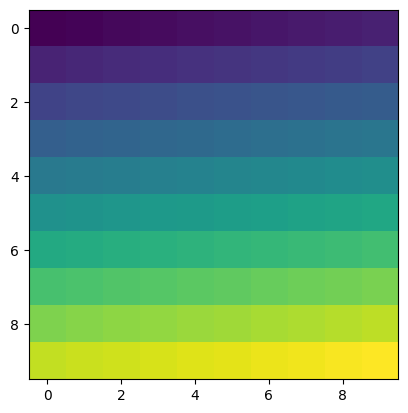

In [24]:
import matplotlib.pyplot as plt
x = np.arange(100).reshape((10,10))
plt.imshow(x,interpolation='none')
#this is imshow which is different than the plt function 
#imshow is generally done for the image data

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


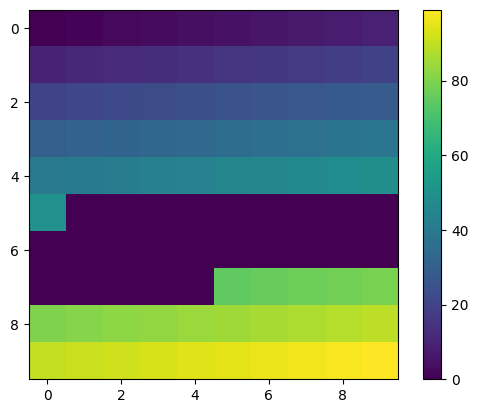

In [25]:
x=np.arange(0,100).reshape(10,10)
x[np.where(np.logical_and(x > 50,x <75))] = 0
print(x)
plt.imshow(x,interpolation='none')
plt.colorbar()

In [32]:
x[np.where(x>50)]=0
print(x)
# np.where(any conditional arguments) it will return the indices

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


**np.where() may be the single most important function that you will use in numpy.** 

Numpy documentation with examples
===

There are over 400 functions in numpy (doing everything from rebinning to
obtaining polynomial least squares fits) in numpy for array
manipulation.

As time permits, please read through the excellent Numpy user guide at

https://numpy.org/doc/stable/user/index.html

We will cover only a fraction of the capabilities on `numpy`in this course.



Masked arrays - np.ma
===

Masked arrays are arrays that may have missing or invalid entries. Very common in astronomy.

In [ ]:
help(np.ma.masked_where)

In [42]:
import numpy as np
import numpy.ma as ma

x = np.array([1, 2, 3, -1, 5])
mx = ma.masked_array(x, mask=[0, 0, 0, 1, 0])
mx2 = ma.masked_array(x, mask=[1, 1, 0, 0, 0])
mx2 = ma.masked_array(x, mask=[True, True, False, False, False]) # equivalent more Pythonic syntax
print (mx2)
print (x.mean())
print (mx.mean())

mx/mx2 # Arithmetic operations on 2 masked arrays possible.

y = ma.masked_where(x>4,x)
print (y)

[-- -- 3 -1 5]
2.0
2.75
[1 2 3 -1 --]


Numpy functions and object methods
===

In [28]:
a = np.arange(100)

print (np.sum(a)) # Functional programming

print (a.sum()) # Object oriented programming

# The same underlying code provides both functional and OO calling functions.

4950
4950


Histograms
===

In [43]:
help(np.random.randn)

Help on method randn in module numpy.random.mtrand:

randn(*args) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)

    Return a sample (or samples) from the "standard normal" distribution.

    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.

    .. note::
        New code should use the
        `~numpy.random.Generator.standard_normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the dis

In [45]:
help(np.histogram2d)

Help on _ArrayFunctionDispatcher in module numpy:

histogram2d(x, y, bins=10, range=None, density=None, weights=None)
    Compute the bi-dimensional histogram of two data samples.

    Parameters
    ----------
    x : array_like, shape (N,)
        An array containing the x coordinates of the points to be
        histogrammed.
    y : array_like, shape (N,)
        An array containing the y coordinates of the points to be
        histogrammed.
    bins : int or array_like or [int, int] or [array, array], optional
        The bin specification:

        * If int, the number of bins for the two dimensions (nx=ny=bins).
        * If array_like, the bin edges for the two dimensions
          (x_edges=y_edges=bins).
        * If [int, int], the number of bins in each dimension
          (nx, ny = bins).
        * If [array, array], the bin edges in each dimension
          (x_edges, y_edges = bins).
        * A combination [int, array] or [array, int], where int
          is the number of 

In [49]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.

    The nu

[ 0.21661042  0.02749835  1.0740757  ...  1.06260961 -1.54745866
 -0.81562095]


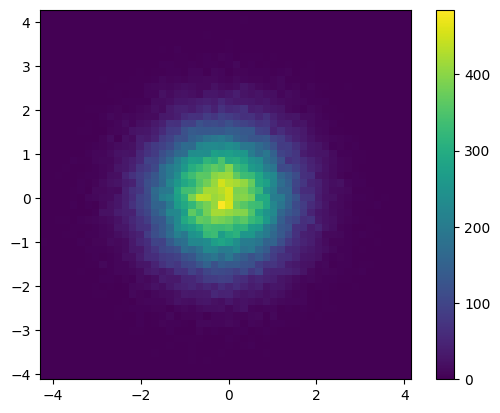

In [53]:

x, y = np.random.randn(2, 100000)

H, xedges, yedges = np.histogram2d(x, y, bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(H, extent=extent)

plt.colorbar()


Matrix objects
===

In [65]:
x1 = np.array([1, 2, 3], float)

x2 = np.asmatrix(x1)

A = np.identity(3)

A = 5* np.asmatrix(A)

B = x2*A # matrix multiplication

np.linalg.inv(A)

np.linalg.det(A)


np.float64(124.99999999999994)

$*$ represents matrix-matrix matrix-vector or vector-matrix multiplication. 

Numpy capabilities
===

* Discrete Fourier Transform (np.fft)
* Linear algebra (np.linalg): cholesky, svd, eigenvalues/vectors, matrix inversion, solving equations (LAPACK)
* Random sampling (np.random)
* statistics: covariance, correlation, variances, histograms
* polynomials: root finding, fitting data 
* Matrix library (np.matlib)
* **f2py** - a FORTRAN to Python interface generator

How fast is numpy?
===

* 100 times faster than with a for loop with native Python types
* Somewhat slower than a modern FORTRAN/C++ compiler with  -O3 optimisations
* comparable speed to Matlab 


But this is run speed. In development and debugging time, Python is
far ahead ofFORTRAN/C++. But if __speed is really critical__ to your code,
you can profile your Python code and rewrite slower parts in
C/C++/FORTRAN.